In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
from sklearn.preprocessing import scale
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

#from imblearn.under_sampling import RandomUnderSampler

In [127]:
df = pd.read_csv('kddcup99_csv.csv')

In [128]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [129]:
y = df.iloc[0:,41].values
#X = df.iloc[0:,4:40].values
#probe = ['ipsweep.','satan.','nmap.','portsweep.']

In [130]:
y = np.where(y == 'ipsweep', 1, np.where(y == 'satan', 1, np.where(y == 'nmap', 1, np.where(y == 'portsweep', 1, 0))))
y

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
X= df.drop (['label'], axis='columns')

In [132]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [133]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['protocol_type', 'service', 'flag']),
    remainder='passthrough')
X1=column_trans.fit_transform(X)



In [134]:
X1

array([[0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.01, 0.  , 0.  ]])

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,train_size=0.8)
X_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [180]:
logreg = LogisticRegression(max_iter=1000000)
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

0.9911643253309582

In [181]:
logreg.n_iter_

array([86], dtype=int32)

In [169]:
y_hat = logreg.predict(X_new)
accuracy=np.mean(y_hat==y)

In [138]:
accuracy

0.9916400145743087

In [149]:
#Summarize your results. 
#What is the training accuracy? My training accuracy is 0.9916400145743087 when I ran it. 
#What is the testing accuracy? The testing accuracy is 0.9911643253309582 after i ran out.
#Do you think your model overfits? My model is not overfit because the testing and training acuracies are not 
#drastically different. They are very similar in the results.

#How many iteration did it take to converge? I got 86 iterations. 

land                        0
dst_host_srv_count          9
dst_host_same_srv_rate    1.0
srv_count                   8
serror_rate               0.0
Name: 0, dtype: object

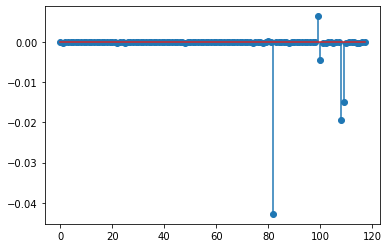

In [142]:
W=logreg.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
idx4=np.argsort(np.abs(W))[-4]
idx5=np.argsort(np.abs(W))[-5]
heavy = df.iloc[0,[(idx1-76), (idx2-76), (idx3-76), (idx4-76), (idx5-76)]]
heavy

In [144]:
#Take a look at the trained model parameters. Which features have the largest weights in absolute value? 
#land                        
#dst_host_srv_count          
#dst_host_same_srv_rate    
#srv_count                   
#serror_rate
#The columns above had the largest weights because these happened to be the biggest ones in absolute value.
#These are potentially most informative features for the trained model. Do they make sense? Why? 
#It makes sense because out of all the data these gives a better range that are wide apart rather than being tightly
#together. In statistics class, I have learned that if there are different numbers that are not close together it is 
#distributed with a variety. 

In [151]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge

srv_count               8
dst_host_srv_count      9
serror_rate           0.0
Name: 0, dtype: object

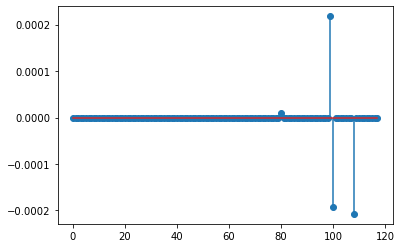

In [185]:
#L1
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
W=lasso.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
column1 = df.iloc[0,[(idx1-76), (idx2-76), (idx3-76)]]
column1

In [186]:
lasso.score(X_test,y_test)

0.03770397862616093

In [187]:
lasso.score(X_train,y_train)

0.03873821118486198

dst_host_same_src_port_rate    0.11
Name: 0, dtype: object

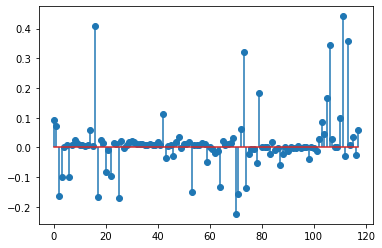

In [192]:
#L2
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
W=ridge.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
idx4=np.argsort(np.abs(W))[-4]
idx5=np.argsort(np.abs(W))[-5]
column2 = df.iloc[0,[(idx1-76)]]
column2

In [159]:
ridge.score(X_test,y_test)

0.7805546094844007

In [160]:
ridge.score(X_train,y_train)

0.7613794062559295

In [ ]:
#As you can see L2 regression is better than L1 because of the accuracy number.

dst_host_same_src_port_rate    0.11
Name: 0, dtype: object

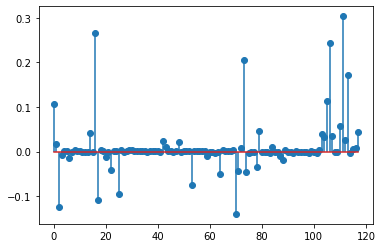

In [162]:
#L2
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)
W=ridge.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
idx4=np.argsort(np.abs(W))[-4]
idx5=np.argsort(np.abs(W))[-5]
column2 = df.iloc[0,[(idx1-76)]]
column2

In [163]:
ridge.score(X_test,y_test)

0.6884857484306288

In [164]:
ridge.score(X_train,y_train)

0.6738133651172131

/Users/soniarahman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07345e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


dst_host_srv_serror_rate    0.0
Name: 0, dtype: object

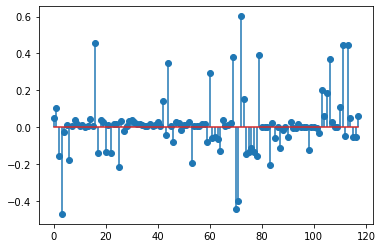

In [194]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
W=ridge.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
idx4=np.argsort(np.abs(W))[-4]
idx5=np.argsort(np.abs(W))[-5]
column2 = df.iloc[0,[(idx1-76)]]
column2

In [195]:
ridge.score(X_test,y_test)

0.7877726619211161

In [196]:
ridge.score(X_train,y_train)

0.7702398416472215

dst_host_same_src_port_rate    0.11
Name: 0, dtype: object

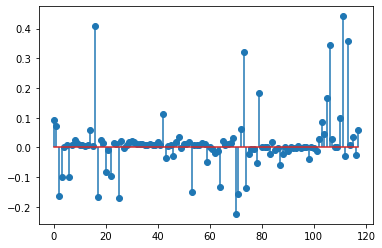

In [197]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
W=ridge.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
idx4=np.argsort(np.abs(W))[-4]
idx5=np.argsort(np.abs(W))[-5]
column2 = df.iloc[0,[(idx1-76)]]
column2

In [198]:
ridge.score(X_test,y_test)

0.7805546094844007

In [199]:
ridge.score(X_train,y_train)

0.7613794062559295

dst_host_same_src_port_rate    0.11
Name: 0, dtype: object

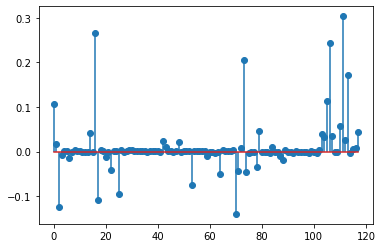

In [201]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)
W=ridge.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
idx4=np.argsort(np.abs(W))[-4]
idx5=np.argsort(np.abs(W))[-5]
column2 = df.iloc[0,[(idx1-76)]]
column2

In [202]:
ridge.score(X_test,y_test)

0.6884857484306288

In [203]:
ridge.score(X_train,y_train)

0.6738133651172131

/Users/soniarahman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.04581e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


dst_host_same_src_port_rate    0.11
Name: 0, dtype: object

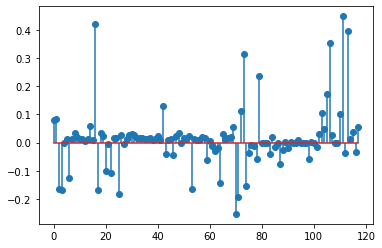

In [204]:
ridge = Ridge(alpha=50)
ridge.fit(X_train, y_train)
W=ridge.coef_
W=W.flatten()
plt.stem(W)
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]
idx4=np.argsort(np.abs(W))[-4]
idx5=np.argsort(np.abs(W))[-5]
column2 = df.iloc[0,[(idx1-76)]]
column2

In [205]:
ridge.score(X_test,y_test)

0.7846153964361366

In [206]:
ridge.score(X_train,y_train)

0.7655723330071387

In [207]:
#I got a warning and that the result may not be accurate when I had the alphas as 50 and 0.01. It did not give me an 
#error when I did 1000 and 100 as the alpha. I noticed the higher the alpha the lower the accuracy. The lower the alpha
#the error red sign showed up for me. This is my extrapolation. 